In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
_include_('curriculum_vqa')
import sys
import os
from cvqa import datasets, models, trainers, viz

data_bin = f'{DEV_HOME}/curriculum_vqa/data-bin'
clevr_root = f'{data_bin}/CLEVR_mini_6'

In [3]:
ds_train, ds_dev = datasets.CLEVR.load_train_dev(clevr_root, struct_viz=True)

100%|██████████| 3600/3600 [00:00<00:00, 4563.19it/s]


In [4]:
import torch
from cvqa.model_dev.lstms import Seq2SeqLSTM

trainer = trainers.VQATrainer(pred_target='target_program_out', ignore_index=ds_train.vocab.pad_index)

model_args = Seq2SeqLSTM.args(ds_train.vocab, ds_train.programs_vocab)
model = Seq2SeqLSTM(model_args)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-3)

train_metrics = trainer.train(model, ds_train, ds_dev, optimizer, num_epochs=5)

[epoch=4, steps=218, train_acc=0.76, dev_acc=0.75] loss: 0.287: 100%|██████████| 5/5 [00:16<00:00,  3.33s/it]


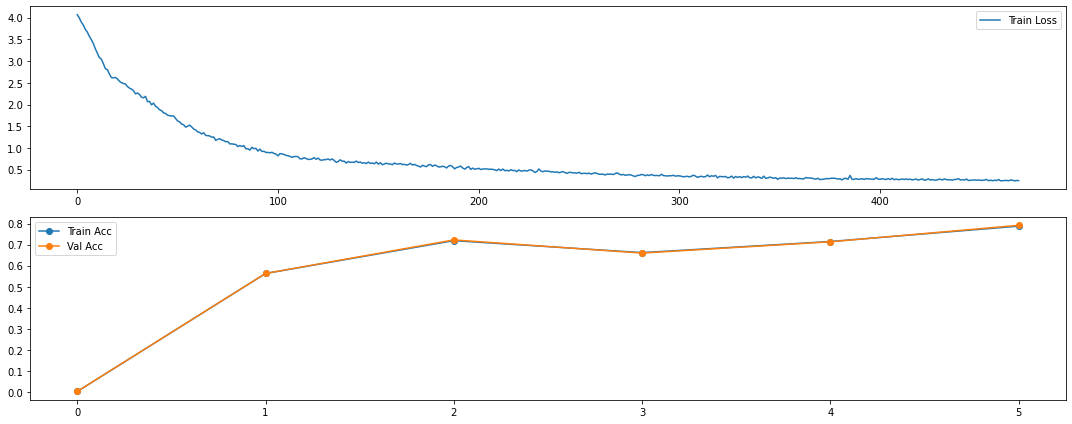

In [12]:
viz.plot_training(*train_metrics)

In [9]:
ds_dev.debug_mode = True
s = next(iter(torch.utils.data.DataLoader(ds_dev, shuffle=True)))

logits, y_pred = model.forward_test(s)

In [10]:
prog_vocab = ds_train.programs_vocab

y_pred

tensor([[31,  5,  6,  5,  7,  8,  9,  5, 10,  7,  8, 14,  5, 26,  7,  8, 11,  5,
          7,  7,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1]])

In [11]:
prog_vocab.string(y_pred)

"query_shape ( scene ( ) . filter_size ( 'small' ) . filter_color ( 'yellow' ) . unique ( ) ) <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"

In [12]:
s['prompt_text']

['The brown metal thing is what shape?']

In [13]:
s['program_str']

["query_shape(scene().filter_color('brown').filter_material('metal').unique())"]